In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 150
import glob, os

import gseapy as gp
import networkx as nx
import timeit
import itertools

# simple plotting function
from gseapy.plot import barplot, dotplot

# Get cleaned data from steps 1 and 2

In [2]:
virus_human = pd.read_csv("../Processed/virus_human.csv")
human_human = pd.read_csv("../Processed/human_important_for_virus.csv")

In [3]:
genes = pd.read_csv("../Data/human_genes.txt", sep="\t", header=None).iloc[:, 0].values
genes_all = pd.read_csv("../Data/human_genes_all.txt", sep="\t", header=None).iloc[:, 0].values

In [4]:
len(genes), len(genes_all), len(virus_human), len(human_human)

(6558, 21340, 22896, 0)

# Gene Set Enrichment Analysis (GSEA)

In [5]:
# human GO annotations
human_names = gp.get_library_name() # default: Human
human_names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [6]:
genes

array(['HOXA10', 'RUFY2', 'HRG', ..., 'UQCRC2', 'BLVRA', 'ABHD10'],
      dtype=object)

In [7]:
# list, dataframe, series inputs are supported
enr = gp.enrichr(gene_list="../Data/human_genes.txt",
                 gene_sets=['KEGG_2016','KEGG_2013'],
                 organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
                 description='test_name',
                 outdir='gene_ontology/enrichr_kegg',
                 no_plot=True,
                 cutoff=0.5 # test dataset, use lower value from range(0,1)
                )

/Users/skulkarni/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)
/Users/skulkarni/opt/anaconda3/lib/python3.8/site-packages/gseapy/enrichr.py:410: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.results = self.results.append(res, ignore_index=True)


In [8]:
#enr.results.Term.unique()

In [9]:
results = enr.results.query("Gene_set=='KEGG_2016'").sort_values("Adjusted P-value")
results["log_adj_pvalue"] = -np.log(results["Adjusted P-value"])

results_high = results.loc[results["Adjusted P-value"] <= np.mean(results["Adjusted P-value"])]

In [10]:
results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,log_adj_pvalue
0,KEGG_2016,Ribosome Homo sapiens hsa03010,112/137,3.085550e-32,9.009805e-30,0,0,9.324877,676.575744,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPL10L;...,66.879239
1,KEGG_2016,Epstein-Barr virus infection Homo sapiens hsa0...,137/202,1.557317e-24,2.139720e-22,0,0,4.390998,240.710477,RB1;ATF2;GTF2B;RBPJ;ICAM1;PSMD8;PSMD6;PSMD7;TB...,49.896197
2,KEGG_2016,Protein processing in endoplasmic reticulum Ho...,120/169,2.198342e-24,2.139720e-22,0,0,5.094623,277.526226,TUSC3;UBE2D3;CAPN2;FBXO6;CAPN1;SEC62;SIL1;MAP3...,49.896197
3,KEGG_2016,RNA transport Homo sapiens hsa03013,115/172,4.754481e-20,3.470771e-18,0,0,4.191343,186.483819,EIF4A2;POP5;EIF4A1;POP7;NUP107;NUP188;POP1;GEM...,40.202155
4,KEGG_2016,Spliceosome Homo sapiens hsa03040,95/134,1.612115e-19,9.414753e-18,0,0,5.051576,218.589607,TCERG1;RBM25;DDX46;DDX42;HNRNPU;PRPF19;EFTUD2;...,39.204254
...,...,...,...,...,...,...,...,...,...,...,...
268,KEGG_2016,Glycosphingolipid biosynthesis - ganglio serie...,2/15,9.785781e-01,9.999951e-01,0,0,0.315131,0.006824,GLB1;SLC33A1,0.000005
269,KEGG_2016,Retrograde endocannabinoid signaling Homo sapi...,24/101,9.817586e-01,9.999951e-01,0,0,0.637544,0.011737,GABRA2;GNAI3;ADCY2;ADCY1;PTGS2;ADCY6;GNAI1;GNA...,0.000005
270,KEGG_2016,alpha-Linolenic acid metabolism Homo sapiens h...,4/25,9.829881e-01,9.999951e-01,0,0,0.390049,0.006693,FADS2;ACOX1;PLA2G4A;PLB1,0.000005
263,KEGG_2016,Intestinal immune network for IgA production H...,11/48,9.504690e-01,9.999951e-01,0,0,0.608717,0.030923,CCL25;CD40;HLA-DMB;TGFB1;ITGA4;HLA-DPB1;CXCR4;...,0.000005


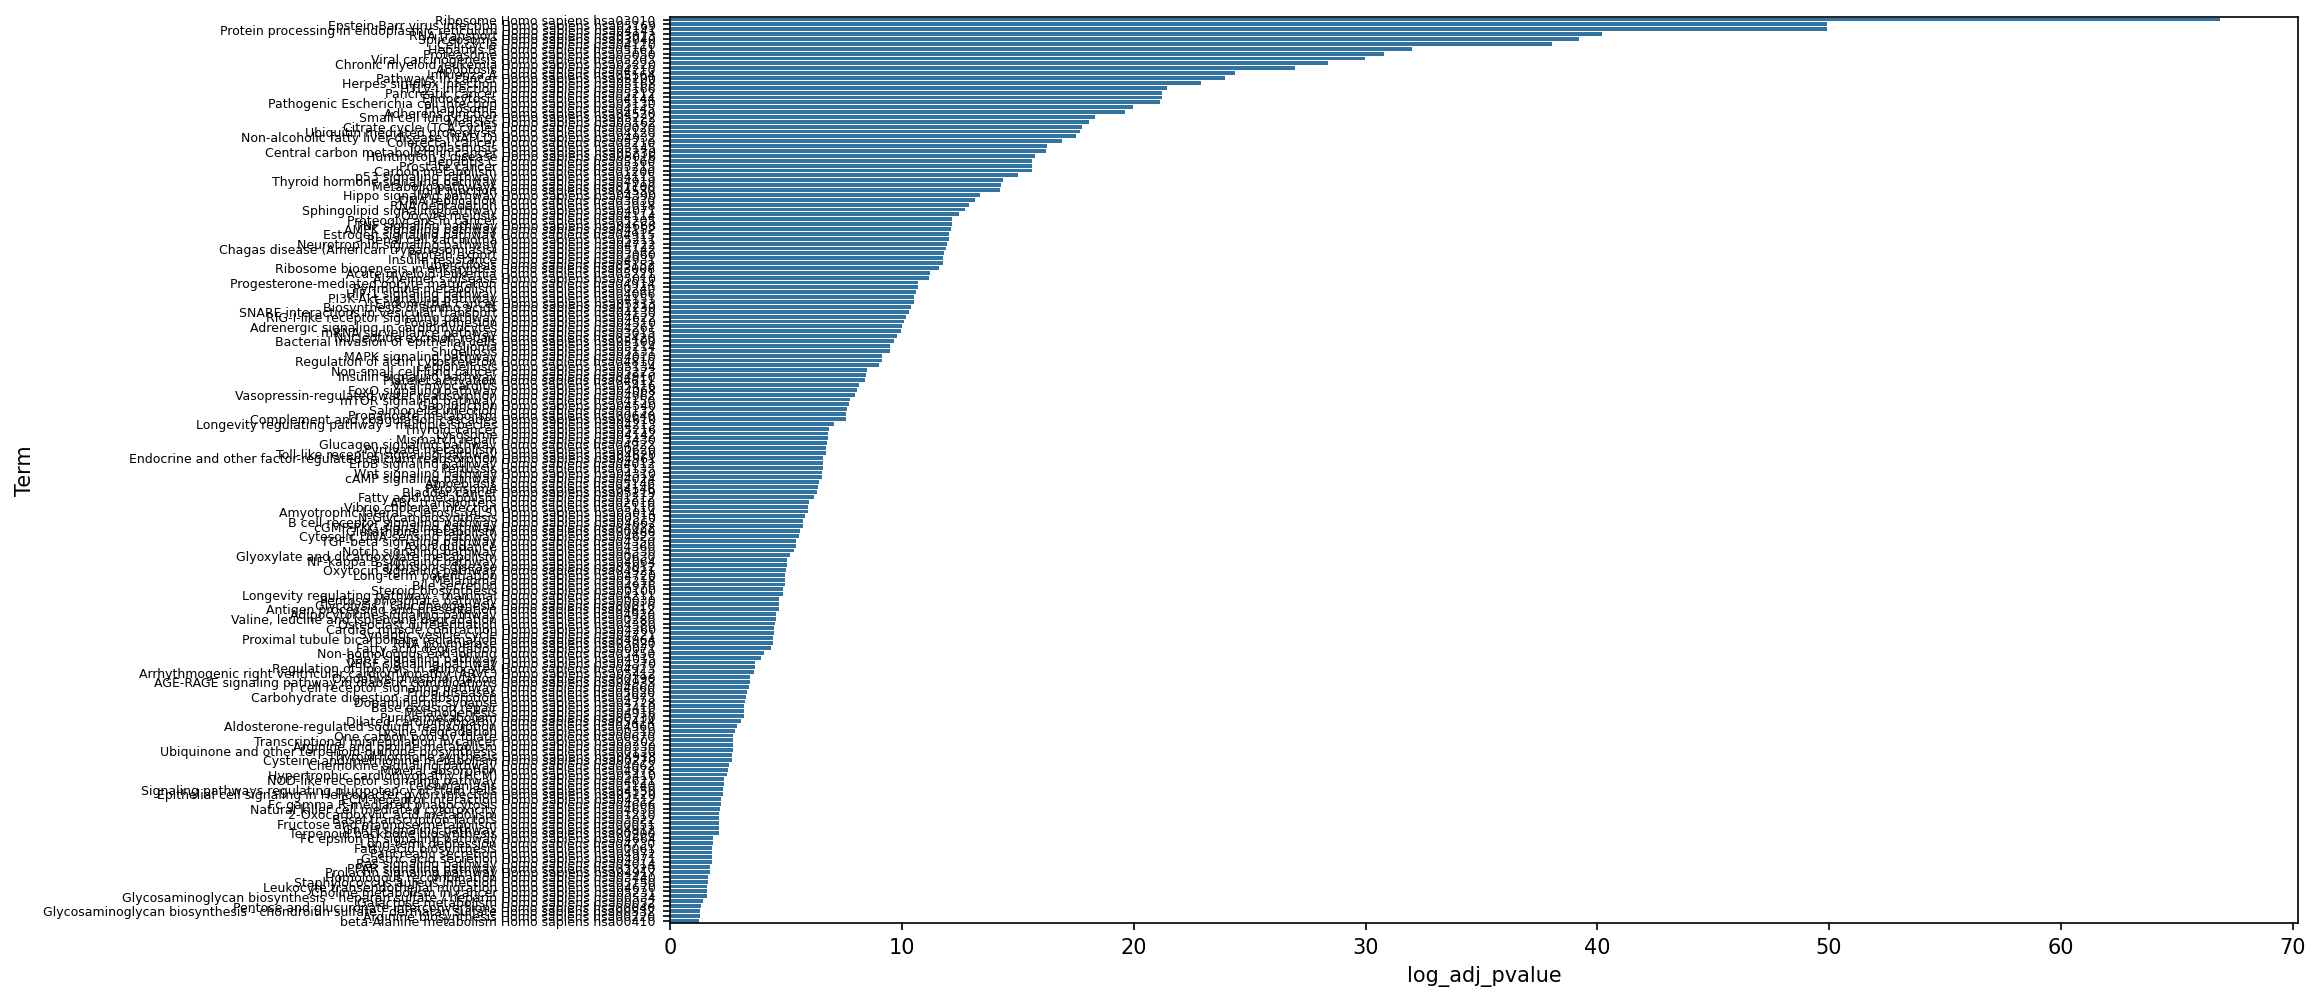

In [11]:
plt.figure(figsize=(14, 8))
sns.barplot(data=results_high, x="log_adj_pvalue", y="Term", color="#1f77b4")
plt.yticks(fontsize=6)
plt.show()

In [12]:
# enr2 = gp.enrichr(gene_list="../Data/human_genes.txt",
#                  description='num_2',
#                  gene_sets="../Data/human_genes_all.txt",
#                  background='hsapiens_gene_ensembl', # or the number of genes, e.g 20000
#                  outdir='gene_ontology_2/enrichr_kegg',
#                  cutoff=0.5, # only used for testing.
#                  verbose=True)

# Results from GOrilla (step 2)

In [13]:
go_function = pd.read_csv("../Processed/GO_function.tsv", sep="\t")
go_process = pd.read_csv("../Processed/GO_process.tsv", sep="\t")

In [14]:
def get_gene_lists(df, ref_gene_set):
    
    genes = df["Genes"].values
    
    genes_cleaned = []
    
    # nested list
    for lst in genes:
        
        genes_list = lst.strip("[]").split(", ")
            
        single_go_list = []
        
        for word in genes_list:
            
            # if the first character is an uppercase letter, then it's a gene name
            if not word[0].isdigit() and word[0].upper() == word[0]:
                
                # make sure that every gene is in the list of original genes, otherwise it's not actually a gene
                # this is because of deprecated gene names. GOrilla uses some old names 
                # don't keep the description of the gene that comes after the hyphen
                if word.split("  -")[0] in ref_gene_set:
                    
                    single_go_list.append(word.split("  -")[0])
        
        genes_cleaned.append(single_go_list)
    
    return genes_cleaned

In [15]:
# Takes several seconds to a minute to run
process_cleaned_genes = get_gene_lists(go_process, genes)
go_process["Genes"] = process_cleaned_genes

function_cleaned_genes = get_gene_lists(go_function, genes)
go_function["Genes"] = function_cleaned_genes

go_process["Number of Genes"] = [len(lst) for lst in go_process["Genes"]]
go_function["Number of Genes"] = [len(lst) for lst in go_function["Genes"]]

go_process = go_process.sort_values("Number of Genes", ascending=False).reset_index(drop=True)
go_function = go_function.sort_values("Number of Genes", ascending=False).reset_index(drop=True)

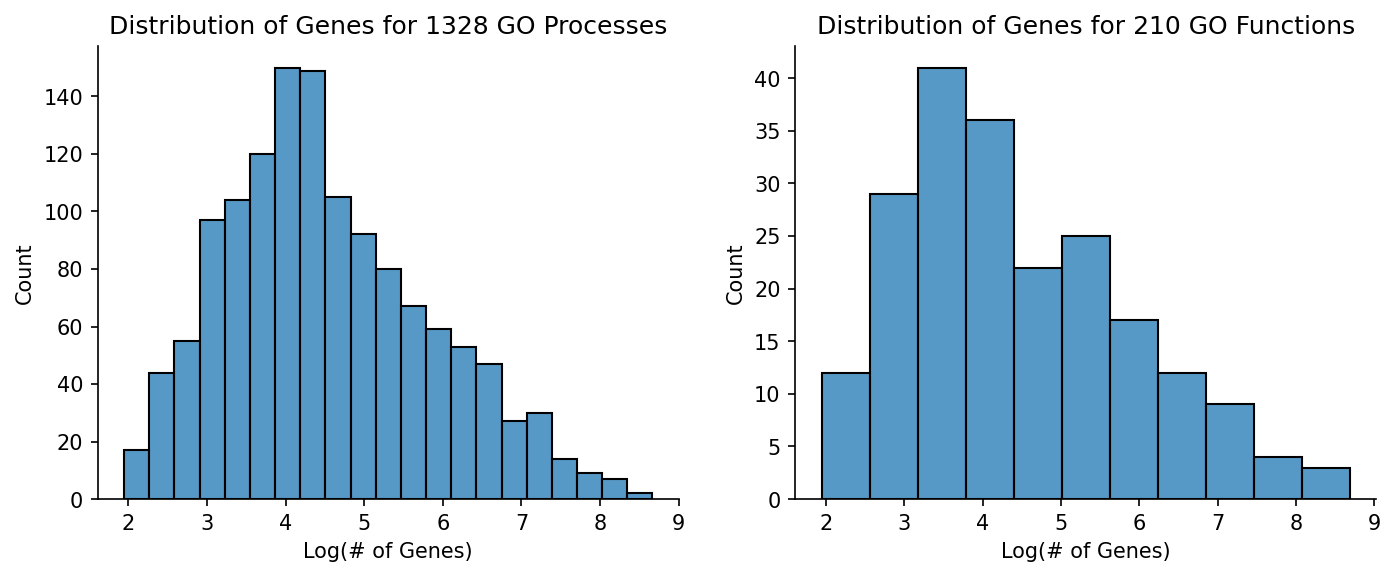

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(np.log(go_process["Number of Genes"]), ax=ax[0])
ax[0].set_title(f"Distribution of Genes for {len(go_process)} GO Processes")
ax[0].set_xlabel("Log(# of Genes)")

sns.histplot(np.log(go_function["Number of Genes"]), ax=ax[1])
ax[1].set_title(f"Distribution of Genes for {len(go_function)} GO Functions")
ax[1].set_xlabel("Log(# of Genes)")

sns.despine()
plt.show()

# Functional Enrichment

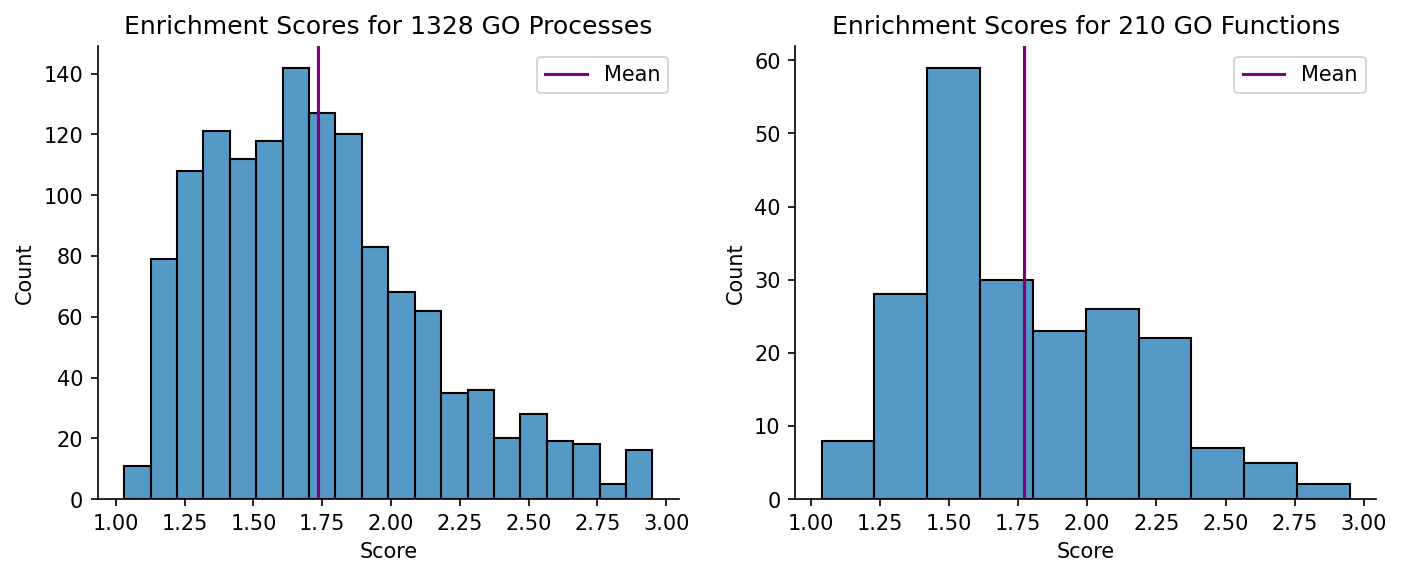

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

sns.histplot(go_process["Enrichment"], ax=ax[0])
ax[0].axvline(x=np.mean(go_process["Enrichment"]), color="purple", label="Mean")
ax[0].set_title(f"Enrichment Scores for {len(go_process)} GO Processes")
ax[0].set_xlabel("Score")
ax[0].legend()

sns.histplot(go_function["Enrichment"], ax=ax[1])
ax[1].axvline(x=np.mean(go_function["Enrichment"]), color="purple", label="Mean")
ax[1].set_title(f"Enrichment Scores for {len(go_function)} GO Functions")
ax[1].set_xlabel("Score")
ax[1].legend()

sns.despine()
plt.show()

# Functions will be more interesting to look at because they are broader, i.e. RNA binding, ubiquitin stuff, etc.

## Good place in the final paper for discussion of enriched functions (defense against viruses, transcription, translation) 

In [18]:
function_high = go_function.loc[go_function["Enrichment"] > np.mean(go_function["Enrichment"])]

# largest q-value post FDR is significant at alpha = 0.05
print(function_high["FDR q-value"].max())
function_high

0.0211


,GO Term,Description,P-value,FDR q-value,Enrichment,N,B,n,b,Genes,Number of Genes
10,GO:0003723,RNA binding,1.070000e-187,4.960000e-184,2.01,18195,1582,6175,1080,"[POP1, EXOSC10, ZNF239, RNPC3, SF3A3, COIL, HN...",1069
49,GO:0016887,ATPase activity,2.400000e-27,3.280000e-25,1.82,18195,354,6175,219,"[HSPA1A, AFG3L2, SMARCAD1, HSPA1B, RFC4, RFC5,...",219
52,GO:0045296,cadherin binding,2.050000e-34,3.290000e-32,1.99,18195,312,6175,211,"[HSPA1A, MAPRE1, PRDX6, EMD, SPTAN1, MARK2, CT...",207
54,GO:0044389,ubiquitin-like protein ligase binding,1.740000e-30,2.610000e-28,1.94,18195,305,6175,201,"[TRIB3, HSPA1A, HSPA1B, PRDX6, DNAJA1, BRCA1, ...",199
55,GO:0031625,ubiquitin protein ligase binding,7.340000e-30,1.070000e-27,1.96,18195,287,6175,191,"[HSPA1A, TRIB3, HSPA1B, PRDX6, DNAJA1, IKBKG, ...",189
...,...,...,...,...,...,...,...,...,...,...,...
205,GO:0032977,membrane insertase activity,6.380000e-04,1.500000e-02,2.46,18195,12,6175,10,"[EMC2, EMC7, EMC4, EMC3, EMC9, EMC1, EMC10, OX...",10
206,GO:0005049,nuclear export signal receptor activity,4.130000e-04,1.040000e-02,2.65,18195,10,6175,9,"[EIF4ENIF1, CSE1L, RAN, XPO5, NUP214, XPO6, XP...",9
207,GO:0051880,G-quadruplex DNA binding,4.130000e-04,1.050000e-02,2.65,18195,10,6175,9,"[XRN1, DHX36, LONP1, WRN, BLM, CNBP, RAD50, NM...",9
208,GO:0016885,"ligase activity, forming carbon-carbon bonds",5.170000e-04,1.250000e-02,2.95,18195,7,6175,7,"[MCCC1, PC, ACACA, PCCA, ACACB, PCCB, MCCC2]",7


In [19]:
# flatten the array of lists of genes and take the unique ones
function_high_genes = np.unique([gene for genes_list in function_high.Genes for gene in genes_list])
print(f"{len(function_high_genes)} genes in the enriched GO functions")

# make a dictionary for easy searching of genes associated with individual GO terms
function_high_dict = dict(zip(function_high["GO Term"], function_high["Genes"]))

2139 genes in the enriched GO functions


In [20]:
def go_terms_for_gene(go_dict, gene):
    
    go_res = []

    for key in go_dict.keys():
        if gene in go_dict[key]:
            go_res.append(key)
            
    return go_res

In [21]:
function_high_GO = [go_terms_for_gene(function_high_dict, gene) for gene in function_high_genes]
assert len(function_high_GO) == len(function_high_genes)

# store in a dictionary for efficient searching
function_high_GO_dict = dict(zip(function_high_genes, function_high_GO))

# Build a network of genes that share GO functions. Values = number of shared GO terms

## Jaccard distance?

$$D = \frac{|A \cap B|}{|A \cup B|}$$

## It might also be interesting to see absolute numbers of shared GO functions and then filter and keep those with high numbers of GO overlap

In [22]:
def jaccard_GO(go_dict, gene1, gene2):
    
    go_1 = go_dict[gene1]
    go_2 = go_dict[gene2]
    
    return len(set(go_1).intersection(go_2)) / len(set(go_1).union(go_2))

def GO_overlap(go_dict, gene1, gene2):
    
    go_1 = go_dict[gene1]
    go_2 = go_dict[gene2]
    
    # return the number of GO functions shared by two proteins, not normalized
    return len(set(go_1).intersection(go_2))

In [23]:
# doesn't include cases where both genes are the same. Don't care about that for GO function analysis, it's not PPIs
gene_pairs = list(itertools.combinations(function_high_genes, 2))
print(f"{len(gene_pairs)} unique gene pairs")

2286591 unique gene pairs


In [24]:
GO_overlap_lst = [GO_overlap(function_high_GO_dict, pair[0], pair[1]) for pair in gene_pairs]

#GO_overlap_lst = [jaccard_GO(function_high_GO_dict, pair[0], pair[1]) for pair in gene_pairs]

In [25]:
genes_1, genes_2 = list(zip(*gene_pairs))
high_df = pd.DataFrame({"gene_1": genes_1, "gene_2": genes_2, "Jaccard": GO_overlap_lst})

# don't keep nodes that have no GO overlap, reduces the size by a factor of 5
high_df = high_df.query("Jaccard != 0").reset_index(drop=True)

## Maybe take only pairs of genes that share all GO functions with each other?

## Want to narrow down the set of interactions to query proteins on PFAM. 

## i.e. proteins that share a lot of GO functions might have similar domains.

## Add UniProt IDs to the dataframe to search in PFAM

In [27]:
human_fixed_df = pd.read_csv("../Data/human_proteins_fixed.tab", sep="\t")

# use this function from step_2_GO_files.py
def get_genes(df, col):
    
    gene_names = []

    for _, row in df.iterrows():

        if not pd.isnull(row["Gene names"]):
            gene_names.append(row["Gene names"].split(" ")[0])
        else:
            gene_names.append(row[col].split("_")[0])
            
    return gene_names

# genes from the virus database
gene_names = get_genes(human_fixed_df, "Entry name")

# mapping from gene to uniprot KB ID
gene_uniprot_mapping = dict(zip(gene_names, human_fixed_df["Entry"]))

In [28]:
go_df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in function_high_GO_dict.items()])).melt().dropna()

# the next two lines are just a super sanity check
go_all = [item for sublist in list(function_high_GO_dict.values()) for item in sublist]
assert len(go_df) == len(go_all)

go_df.columns = ["Gene", "GO"]

# add the UniProt column too
go_df["UniProt"] = go_df["Gene"].map(gene_uniprot_mapping)

# save to a dataframe for easy use later
go_df.to_csv("../Processed/enriched_GO_proteins.csv", index=False)

In [29]:
# add uniprot IDs to the jaccard dataframe
high_df["uniprot_1"] = high_df["gene_1"].map(gene_uniprot_mapping)
high_df["uniprot_2"] = high_df["gene_2"].map(gene_uniprot_mapping)

# Get sequences from UniProt (searching with the same file as before) to batch search in PFAM

## Sequences are broken up with new line characters so have to combine them into a single string and remake fasta

In [30]:
human_proteins_IDs = []
ids_indices = []

# first get indices of the sequence IDs
with open("../Data/human_proteins_fixed_seq.fasta", "r") as file:
    
    for number, line in enumerate(file):     
        if ">" in line:
            ids_indices.append(number)
            human_proteins_IDs.append(line.lstrip(">").rstrip("\n"))
            
uniprot_ids = [val.split("|")[1] for val in human_proteins_IDs]
human_proteins_seq = []

with open("../Data/human_proteins_fixed_seq.fasta", "r") as file:
    
    lines = list(zip(*enumerate(file)))[1]
    
    for i in range(1, len(ids_indices)):
        
        individual_line = []
    
        start = ids_indices[i-1]+1
        end = ids_indices[i]
        
        human_proteins_seq.append("".join(lines[start:end]).replace("\n", ""))
        
    # add the last one manually because it goes to the end
    human_proteins_seq.append("".join(lines[ids_indices[-1]+1:]).replace("\n", ""))

uniprot_sequence_dict = dict(zip(uniprot_ids, human_proteins_seq))

In [31]:
high_df["seq_1"] = high_df["uniprot_1"].map(uniprot_sequence_dict)
high_df["seq_2"] = high_df["uniprot_2"].map(uniprot_sequence_dict)

# should both be 0 to check that no uniprots were missing
print(sum(pd.isnull(high_df["seq_1"])))
print(sum(pd.isnull(high_df["seq_2"])))

0
0


In [35]:
nodes = list(set(high_df["uniprot_1"]).union(high_df["uniprot_2"]))

print(f"{len(nodes)} nodes in the cofunctionality network")

seqs_for_fasta = [uniprot_sequence_dict[uniprot] for uniprot in nodes]

# save this to a csv to use later too. Big file (800,000 rows), don't commit to github
# high_df.to_csv("../Processed/jaccard_non_zero.csv.gz", compression="gzip", index=False)
high_df.to_csv("../Processed/GO_distances.csv.gz", compression="gzip", index=False)

2139 nodes in the cofunctionality network


# HMMER only allows 500 sequences at a time with a maximum length of 5000

## So manually query the 8 (-1 because titin) sequences longer than 5000

## Broke up the remaining sequences into multiple fasta files and queried them

## 2139 proteins searched, 28__ proteins with domains

In [159]:
def write_fasta_file(seqs_lst, ids_lst, start_index, end_index, fName):
    
    with open(fName, "w+") as file:
        
        for i in range(start_index, end_index):

            # The database can't search sequences longer than 5000. There are only 5 longer than 5000, so can manually search those
            if len(seqs_lst[i]) <= 5000:
                file.write(">" + ids_lst[i] + "\n")
                file.write(seqs_lst[i] + "\n")

In [162]:
write_fasta_file(seqs_for_fasta, nodes, 0, 500, "../Data/proteins_seq_small_1.fasta")
write_fasta_file(seqs_for_fasta, nodes, 500, 1000, "../Data/proteins_seq_small_2.fasta")
write_fasta_file(seqs_for_fasta, nodes, 1000, 1500, "../Data/proteins_seq_small_3.fasta")
write_fasta_file(seqs_for_fasta, nodes, 1500, 2000, "../Data/proteins_seq_small_4.fasta")
write_fasta_file(seqs_for_fasta, nodes, 2000, len(seqs_for_fasta), "../Data/proteins_seq_small_5.fasta")

In [150]:
lengths = [len(seq) for seq in seqs_for_fasta]
ind_long = np.where(np.array(lengths) > 5000)[0]

In [151]:
for index in ind_long:
    print(nodes[index])

Q63HN8
Q09666
Q9NU22
P58107
Q03001
Q86UQ4
Q8NF91
